In [15]:
import os.path as path
from pickle import load, dump
import warnings

import pandas as pd
import numpy as np

from xgboost import XGBClassifier

import shap

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)
warnings.filterwarnings("ignore")   

In [16]:
# Load only X data
X_test = pd.read_csv(path.join("3_X_fitted_dataframe", "X_test_scaled.csv"))
X_train = pd.read_csv(path.join("3_X_fitted_dataframe", "X_train_scaled.csv"))

try:
    print("\nData loaded\n...")
except Exception as e:
    logger.exception(
        "Unable to download training & test CSV, check your internet connection. Error: %s",
    )


Data loaded
...


In [17]:
# Loard our xgBoost model
XGB_clf = load(open(path.join('6_models', 'xgBoost.pkl'), 'rb'))

In [18]:
data_for_prediction = X_test.iloc[1]  # show one point of the dataset, which is the second row
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
print(data_for_prediction_array.shape)

(1, 234)


In [19]:
# Predict the class belonging probability 
XGB_clf.predict_proba(data_for_prediction_array)

array([[0.9772413 , 0.02275874]], dtype=float32)

In [20]:
# Create the explainer object, to compute Shap values, with optimized TreeExplainer
explainer = shap.TreeExplainer(XGB_clf)

In [21]:
# Calculate Shap values for one observation
shap_values = explainer.shap_values(data_for_prediction_array)

In [22]:
# Use javascript style
shap.initjs()

In [23]:
# Visualize each impact of features for a specific observation and its target prediction
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

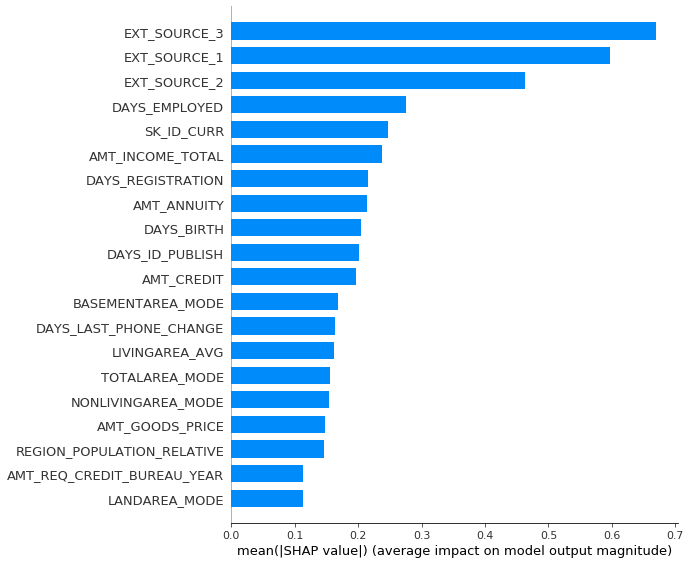

In [25]:
# Compute the average impact of each features
# Features from the top have the best prediction impact than the bottom ones
shap.summary_plot(explainer.shap_values(X_train), X_train, plot_type="bar")

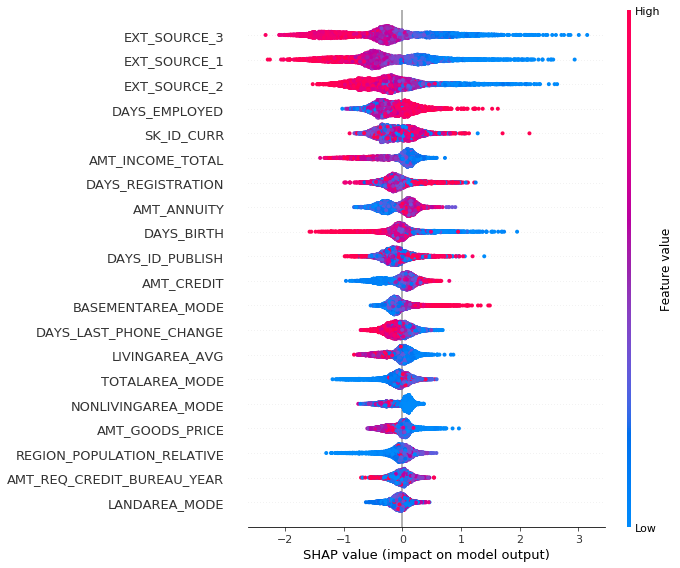

In [26]:
# Visualize positive and negative relationships of the features with the target
# Made with all the data points, descending order
shap.summary_plot(explainer.shap_values(X_train), X_train)